In [1]:
import sys
sys.path.append('..')
import numpy as np
import json
import matplotlib.pyplot as plt
from janusq.cloud_interface import submit
from janusq.data_objects.circuit import Circuit

In [2]:
from qiskit import QuantumCircuit
qc = QuantumCircuit(4)
qc.h(0)
qc.cx(0, 1)
qc.cx(1, 2)
qc.cx(2, 3)

circuit = Circuit(qc)
print(json.dumps(circuit))

[[{"name": "h", "qubits": [0], "params": []}], [{"name": "cx", "qubits": [0, 1], "params": []}], [{"name": "cx", "qubits": [1, 2], "params": []}], [{"name": "cx", "qubits": [2, 3], "params": []}]]


In [3]:
circuit = circuit # circuit need to run
label = 'ghz_state'
shots = 3000
run_type = 'simulator'
result = submit(circuit=circuit, label=label, shots=shots, run_type=run_type, API_TOKEN='1')
print(result)

[0.50933333 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.49066667]


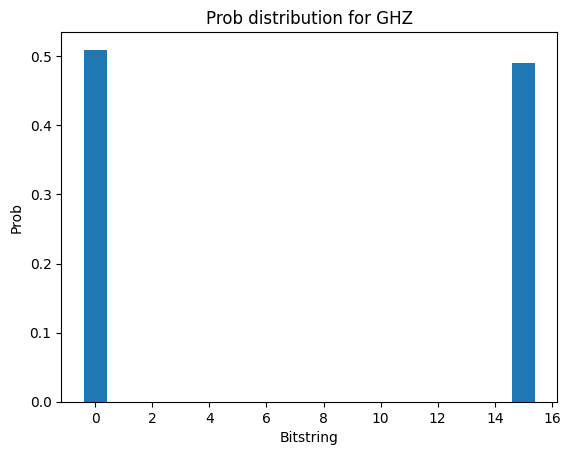

In [4]:
x = range(len(result))

plt.bar(x, result)
plt.xlabel('Bitstring')
plt.ylabel('Prob')
plt.title('Prob distribution for GHZ')
plt.show()

In [6]:
# W state
qnum = 4
qc = QuantumCircuit(qnum)

def CG_gate(qc: QuantumCircuit, q_idx: int, qnum: int):
    theta = np.arccos(np.sqrt(1/(q_idx+2)))
    qc.ry(-theta, q_idx)
    qc.cz(q_idx, q_idx+1)
    qc.ry(theta, q_idx)

qc.rx(np.pi, qnum-1)

for q_idx in np.arange(qnum-2, -1, -1):
    CG_gate(qc, q_idx, qnum)

for q_idx in np.arange(qnum-2, -1, -1):
    qc.cx(q_idx, q_idx+1)

circuit = Circuit(qc)

circuit = circuit # circuit need to run
label = 'w_state'
shots = 3000
run_type = 'sqcg'

result = submit(circuit=circuit, label=label, shots=shots, run_type=run_type, API_TOKEN='1')
print(result)

[0.007232069048808328, 0.2506988555554525, 0.26038218451375, 0.0, 0.2398369791341215, 0.0, 0.0, 0.0017533738166481665, 0.23737313374830826, 0.0, 0.0, 0.0007173273562494651, 0.0, 0.0008944503923142659, 0.0011116264343474743, 0.0]


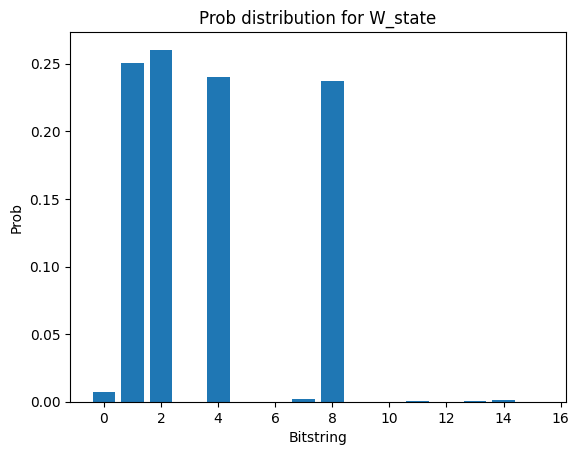

In [7]:
x = range(len(result))

plt.bar(x, result)
plt.xlabel('Bitstring')
plt.ylabel('Prob')
plt.title('Prob distribution for W_state')
plt.show()